## Notebook for the visualization of Stem Cells markers in all Gut Stem cells (Adult + Fetal)

- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Date:** 3rd April 2024

### Load required modules

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["ps.fonttype"] = 42

In [3]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 180, color_map = 'magma_r', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.9.2
scanpy      1.9.5
-----
PIL                         10.0.1
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.1.0
attrs                       23.1.0
babel                       2.13.0
backcall                    0.2.0
certifi                     2023.07.22
cffi                        1.16.0
charset_normalizer          3.3.0
colorama                    0.4.6
comm                        0.1.4
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.8.0
decorator                   5.1.1
defusedxml                  0.7.1
executing                   2.0.0
fastjsonschema              NA
fqdn                        NA
h5py                        3.9.0
idna                        3.4
igraph                      0.11.2
ipykernel                   6.25.2
ipywidgets                  8.1.1
isoduration                 NA
jedi   

In [4]:
def X_is_raw(adata):
    return np.array_equal(adata.X.sum(axis=0).astype(int), adata.X.sum(axis=0))

### Data Upload


In [5]:
adata = sc.read_h5ad('/mnt/LaCIE/annaM/gut_project/Processed_data/Gut_data/Healthy_reference/Integrated/Healthy_integrated_data_all_genes.h5ad')
adata

AnnData object with n_obs × n_vars = 557099 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'

In [6]:
X_is_raw(adata)

True

### Explore the dataset

In [12]:
df = adata.obs['Cell States'].value_counts() 

In [13]:
adata.obs['Cell Type'].value_counts() 

Cell Type
Epithelial         210075
Mesenchymal        172657
T cells             47043
Plasma cells        46681
Myeloid             25587
Neuronal            19307
B cells             17772
Endothelial         16631
Red blood cells      1346
Name: count, dtype: int64

In [92]:
adata

AnnData object with n_obs × n_vars = 557099 × 26442
    obs: 'Sample_ID', 'Cell Type', 'Study_name', 'Donor_ID', 'Diagnosis', 'Age', 'Region code', 'Fraction', 'Sex', 'Library_Preparation_Protocol', 'batch', 'Age_group', 'Location', 'Cell States', 'Cell States GCA', 'Chem', 'Layer', 'Cell States Kong', 'dataset', 'n_genes_by_counts', 'total_counts', 'total_counts_mito', 'pct_counts_mito', 'total_counts_ribo', 'pct_counts_ribo', 'Cell_ID', '_scvi_batch', '_scvi_labels'
    var: 'feature_types-0-0-0', 'gene_name-1-0-0', 'gene_id-0-0', 'GENE-1-0'

In [14]:
adata_log = adata.copy()
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['AC008124.1', 'ACP5', 'ACTA2', 'ACTB', 'ACTG2', 'ADAMDEC1', 'AGR2', 'AIF1', 'AKIP1', 'ANXA1', 'APOA1', 'APOA4', 'APOC1', 'APOC3', 'APOD', 'APOE', 'ATP5MC3', 'ATP5PF', 'ATP6V1F', 'B2M', 'BEST4', 'C1QA', 'C1QB', 'CA1', 'CA2', 'CA4', 'CCK', 'CCL11', 'CCL13', 'CCL17', 'CCL19', 'CCL2', 'CCL20', 'CCL21', 'CD320', 'CD52', 'CD69', 'CD74', 'CD79A', 'CELA3B', 'CFD', 'CHGA', 'CLC', 'CLCA1', 'CLIC1', 'CLPS', 'CLU', 'COL1A1', 'COL1A2', 'COL3A1', 'CORO1C', 'COX4I1', 'COX7C', 'CRYAB', 'CRYBA2', 'CST3', 'CTGF', 'CXCL10', 'CXCL14', 'CXCL2', 'CXCL8', 'CXCR4', 'CYBA', 'CYCS', 'DCN', 'DDIT4', 'DEFA5', 'DEFA6', 'DNAJB1', 'DRG1', 'DUSP1', 'DUSP2', 'DYNLL1', 'EEF1A1', 'FABP1', 'FABP4', 'FABP5', 'FABP6', 'FDCSP', 'FOS', 'FTH1', 'FTL', 'FXYD3', 'GAPDH', 'GAST', 'GCG', 'GHRL', 'GIP', 'GMFG', 'GNLY', 'GSN', 'GUCA2A', 'GUCA2B', 'GZMA', 'GZMB', 'H3F3B', 'HAX1', 'HBA1', 'HBA2', 'HBB', 'HBE1'

In [21]:
# if cell is in cells_to_keep, than relabel it in Cell Types to 'stem cell'
cells_to_keep = ['Stem cells OLFM4', 'Stem cells OLFM4 LGR5', 'Stem_Cells_GCA', 'Stem cells OLFM4 PCNA', 'Stem cells OLFM4 GSTA1', 'Stem_Cells_ext']
adata_log.obs['Cell Type'] = adata_log.obs['Cell Type'].cat.add_categories('Stem cell')
adata_log.obs.loc[adata_log.obs['Cell States'].isin(cells_to_keep), 'Cell Type'] = 'Stem cell'

In [27]:
adata_log.obs['Study_name'].value_counts()

Study_name
Elmentaite, 2021    372785
Kong, 2023          181806
Smilie, 2019          1848
Wang, 2020             660
Name: count, dtype: int64

In [28]:
datasets = ['Elmentaite, 2021', 'Smilie, 2019', 'Wang, 2020']
adata_log_filtered = adata_log[adata_log.obs['Study_name'].isin(datasets), :]

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

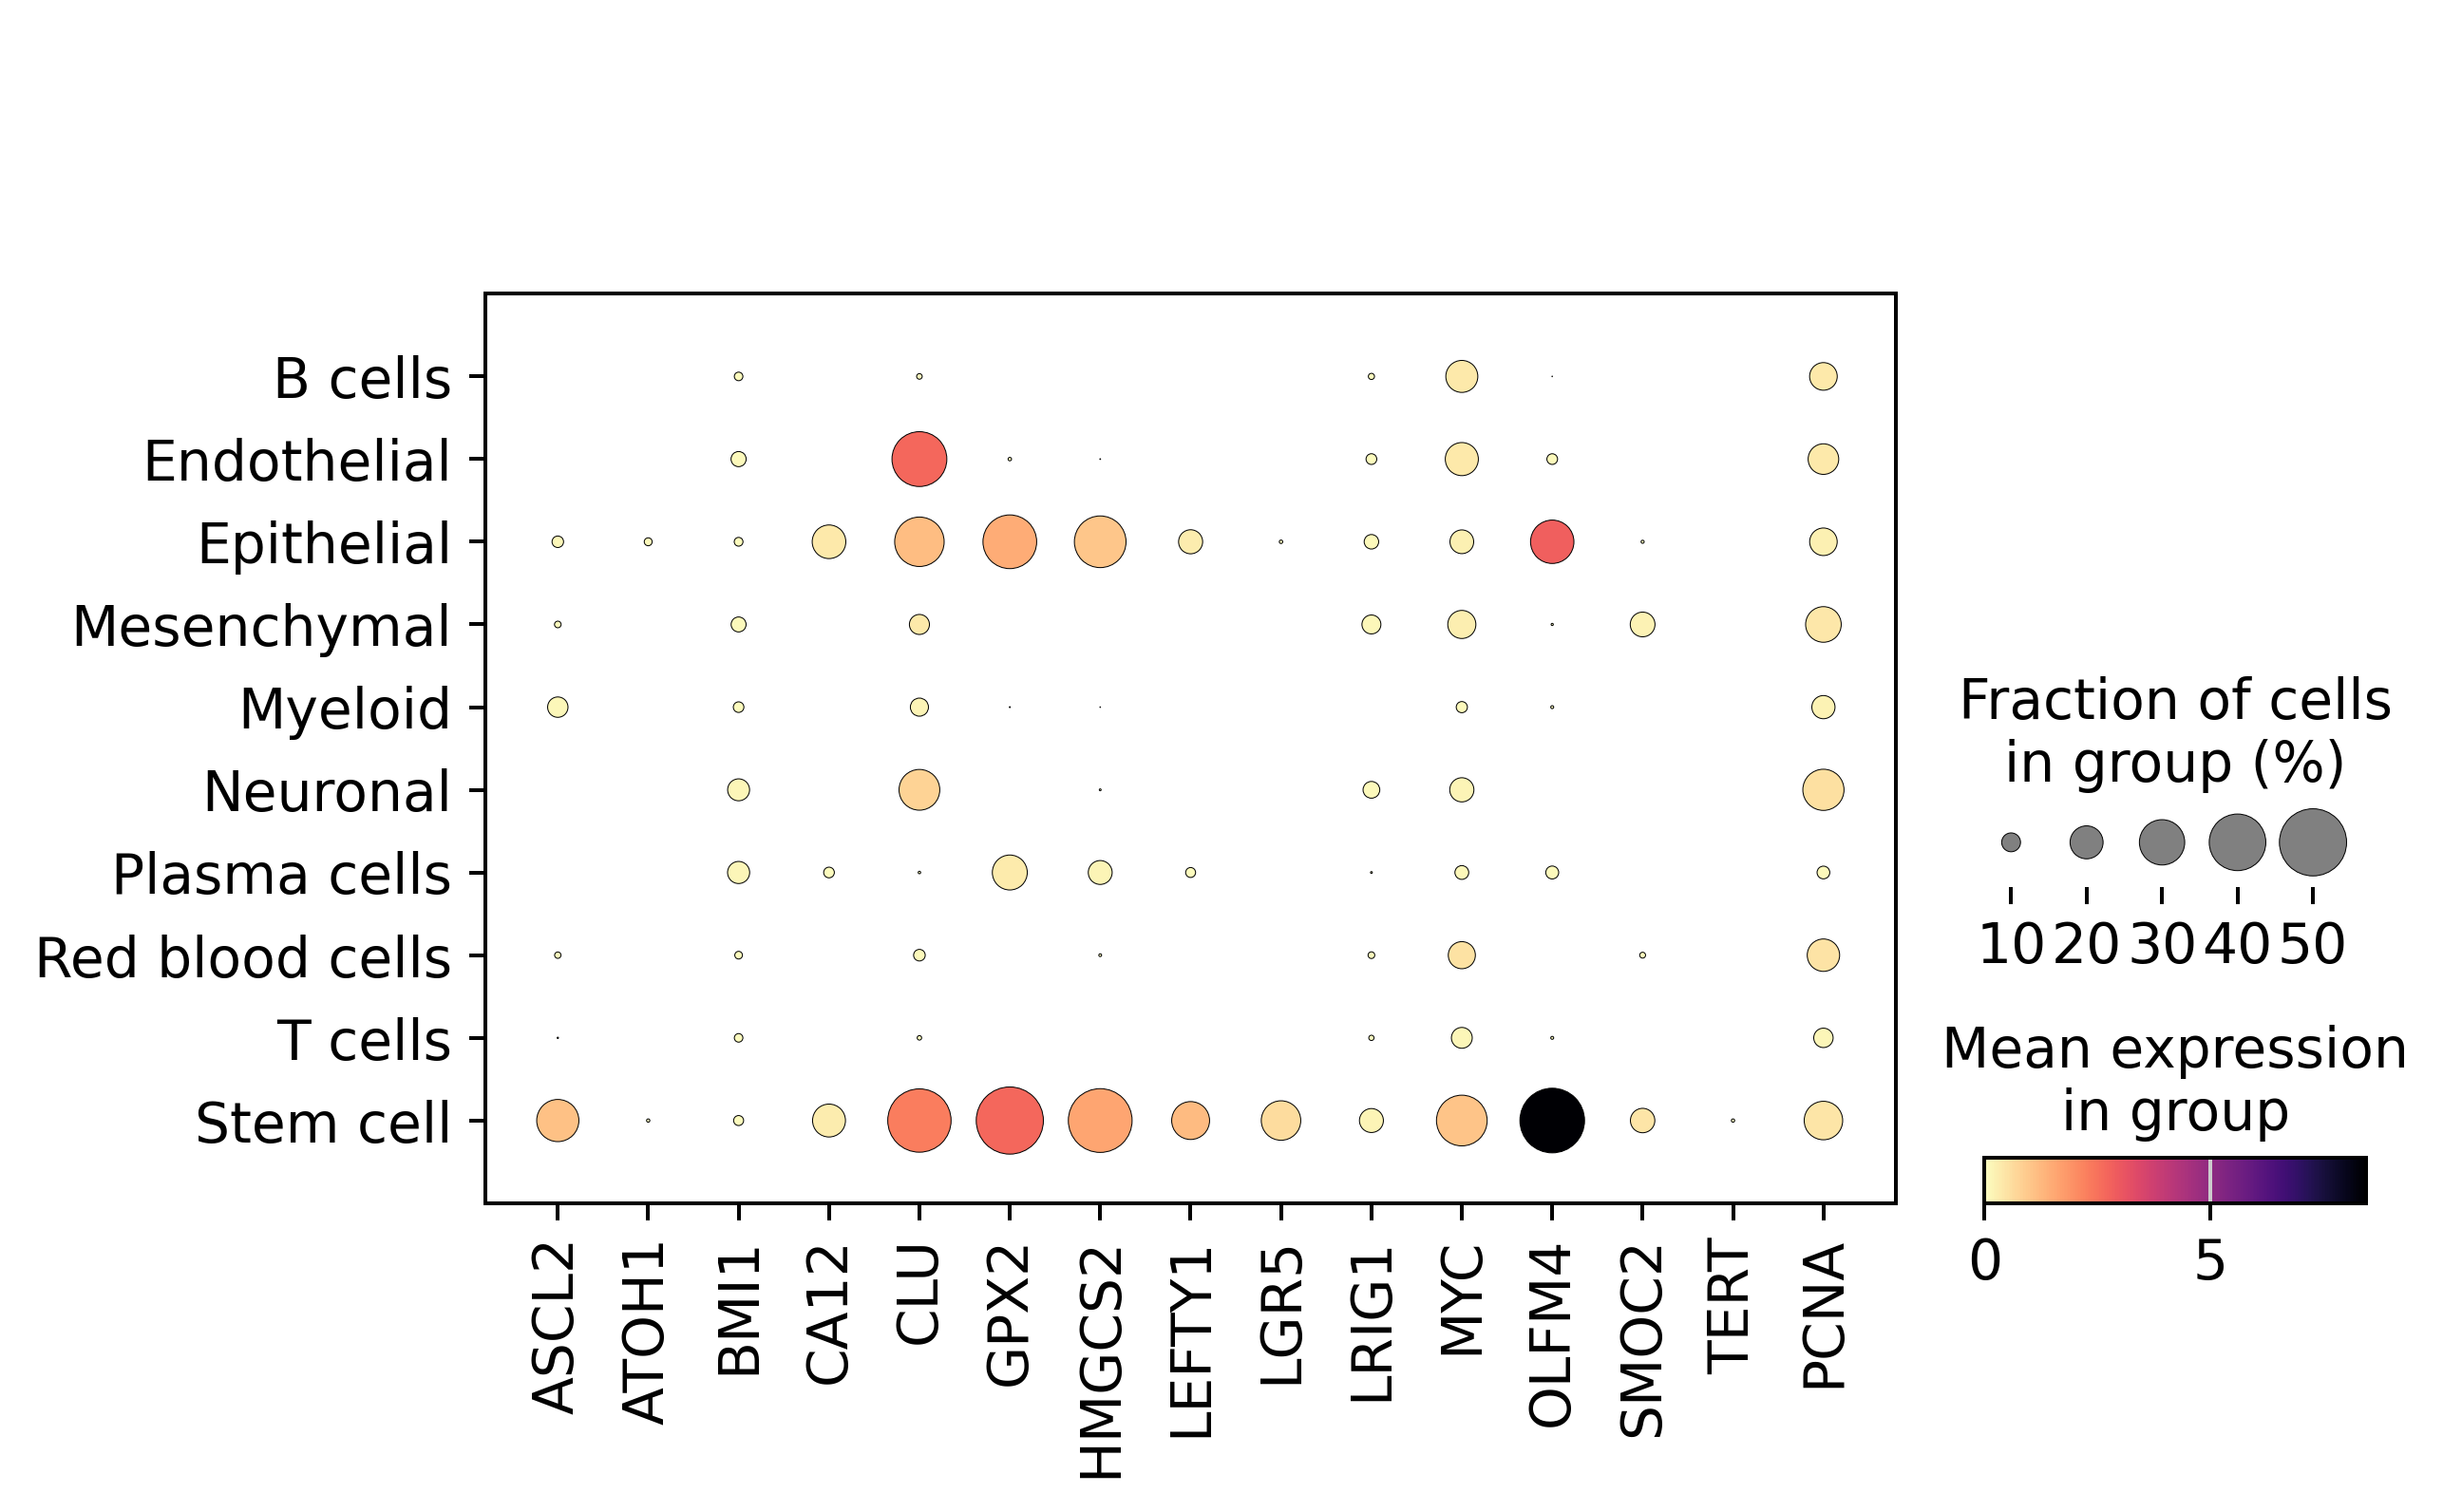

In [94]:
stem_cells_markers = ['ASCL2', 'ATOH1', 'BMI1', 'CA12', 'CLU', 'GPX2', 'HMGCS2', 'LEFTY1', 'LGR5', 'LRIG1', 'MYC', 'OLFM4', 'SMOC2', 'TERT']

sc.pl.dotplot(adata_log_filtered, stem_cells_markers, groupby='Cell Type', cmap = 'magma_r', dot_max=0.5,
                   dot_min=0.01) 

In [ ]:
"TSPAN8", "OLFM4"

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

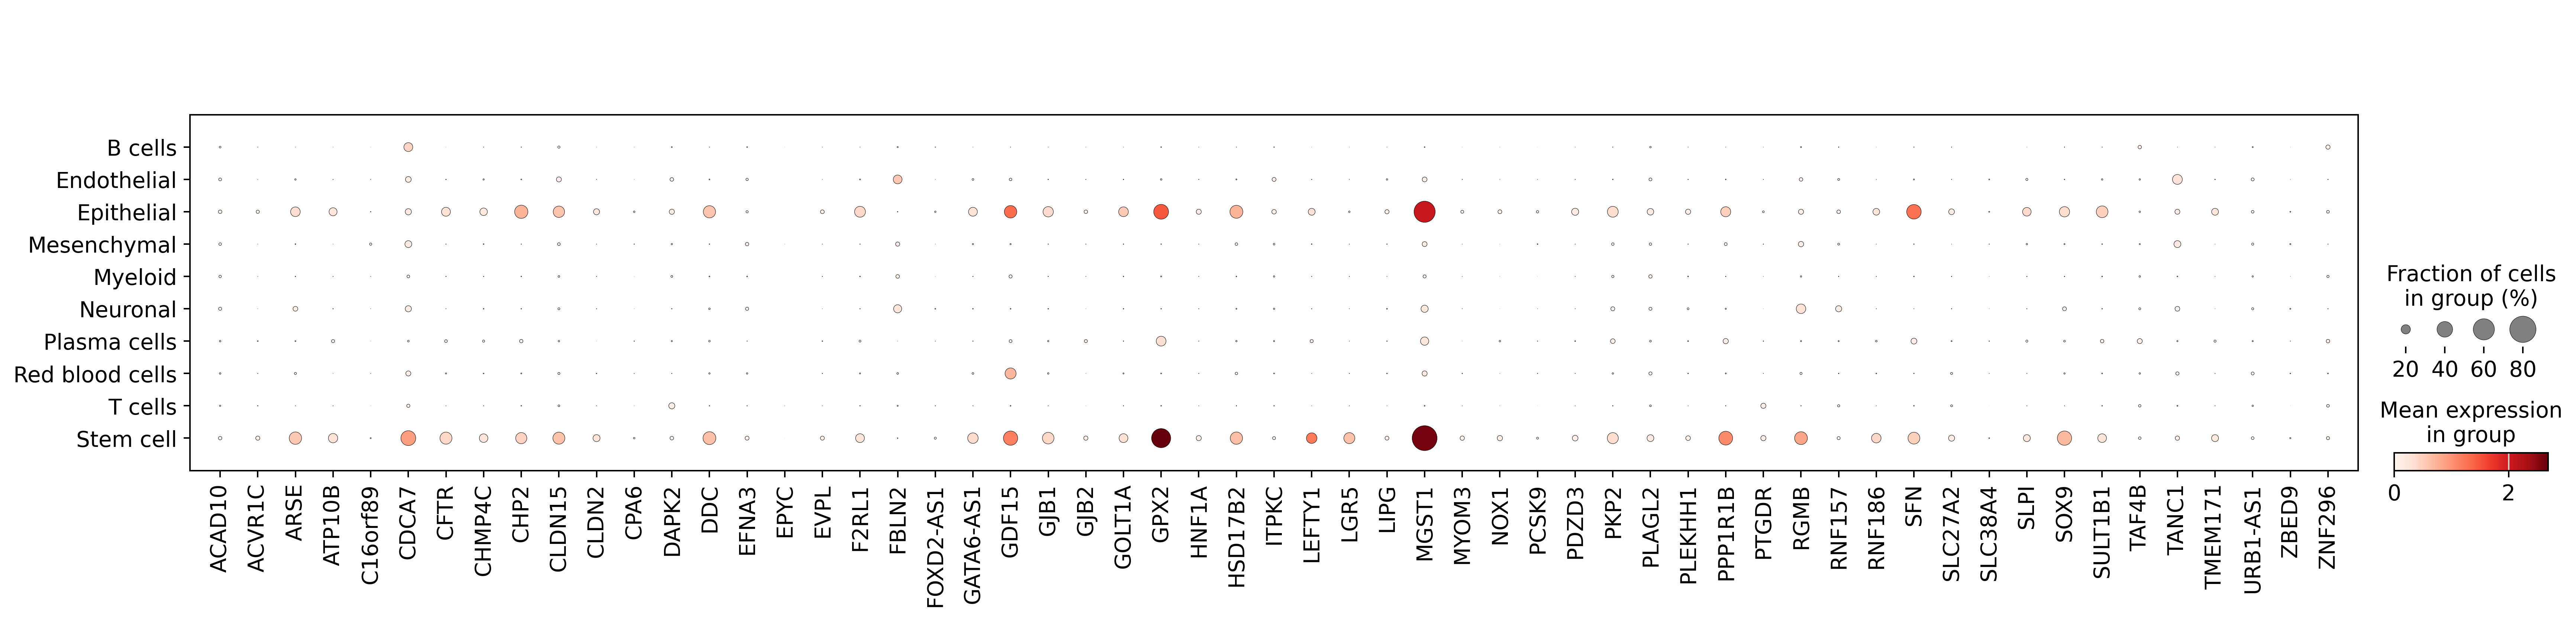

In [46]:
stem_cells_markers = ["ACAD10", "ACVR1C", "ARSE", "ATP10B", "C16orf89", "CDCA7", "CFTR", 
                      "CHMP4C", "CHP2", "CLDN15", "CLDN2", "CPA6", "DAPK2", "DDC", "EFNA3", "EPYC", 
                      "EVPL", "F2RL1", "FBLN2", "FOXD2-AS1", "GATA6-AS1", "GDF15", "GJB1", "GJB2", "GOLT1A", 
                      "GPX2", "HNF1A", "HSD17B2", "ITPKC", "LEFTY1", "LGR5", "LIPG",  
                      "MGST1", "MYOM3", "NOX1", "PCSK9", "PDZD3", "PKP2", "PLAGL2", "PLEKHH1", "PPP1R1B", 
                      "PTGDR", "RGMB", "RNF157", "RNF186", "SFN", "SLC27A2", "SLC38A4", "SLPI", "SOX9", "SULT1B1", 
                      "TAF4B", "TANC1", "TMEM171", "URB1-AS1", "ZBED9", "ZNF296"
                      ]

sc.pl.dotplot(adata_log_filtered, stem_cells_markers, groupby='Cell Type')

/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/home/amaguza/miniforge3/envs/scanpy_env/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be igno

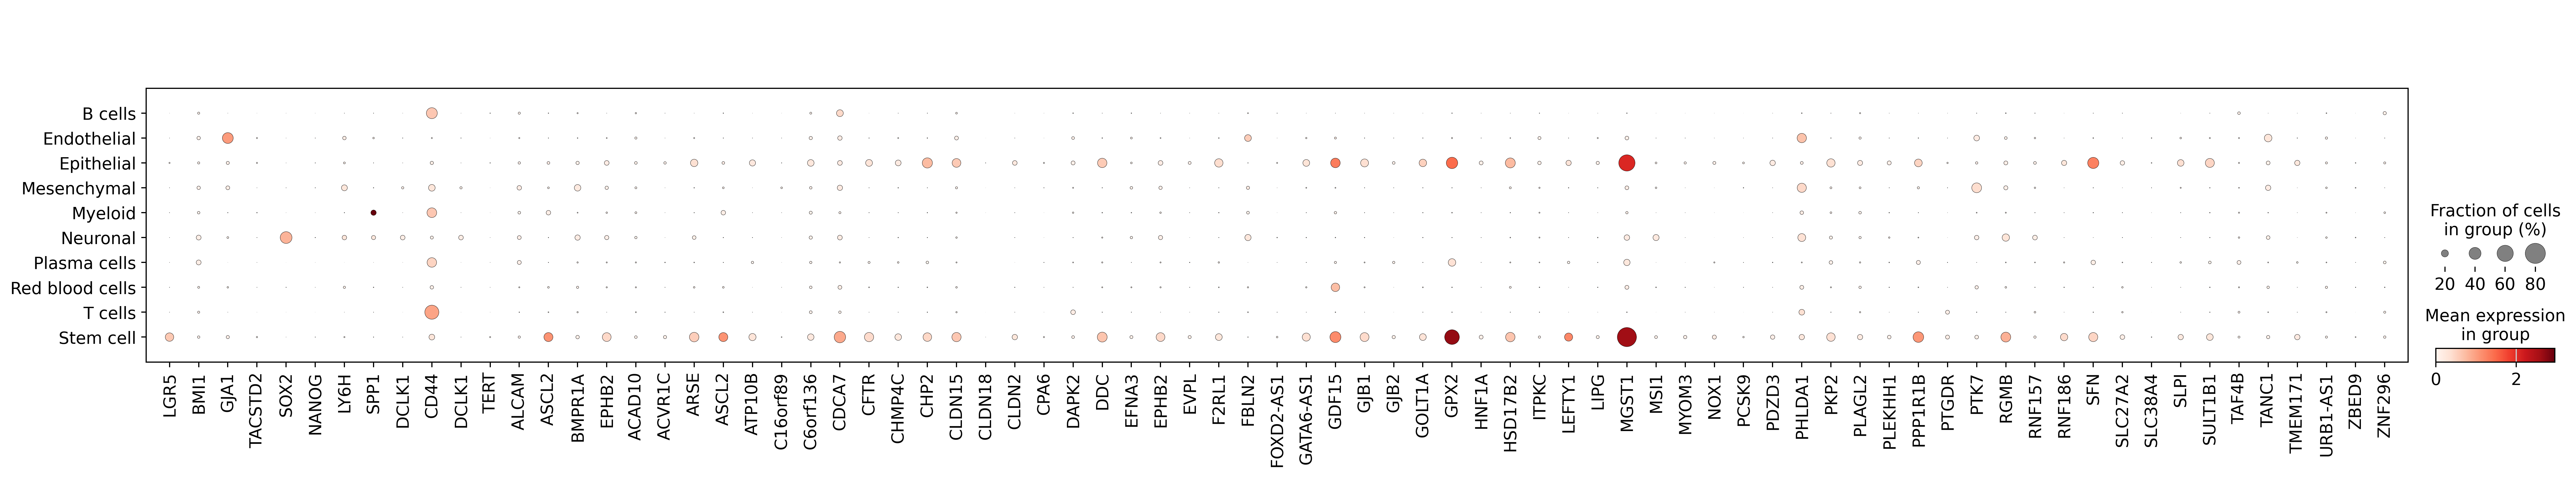

In [30]:
stem_cells_markers = ['LGR5', 'BMI1', 'GJA1', 'TACSTD2', 'SOX2', 'NANOG', 'LY6H', 'SPP1', 'DCLK1', 'CD44', 'DCLK1', 'TERT', 'ALCAM', 'ASCL2', 'BMPR1A', 'EPHB2', 'ACAD10', 
                      'ACVR1C', 'ARSE', 'ASCL2', 'ATP10B', 'C16orf89', 'C6orf136', 'CDCA7', 'CFTR', 'CHMP4C', 'CHP2', 'CLDN15', 'CLDN18', 'CLDN2', 'CPA6', 'DAPK2', 'DDC', 
                      'EFNA3', 'EPHB2', 'EVPL', 'F2RL1', 'FBLN2', 'FOXD2-AS1', 'GATA6-AS1', 'GDF15', 'GJB1', 'GJB2', 'GOLT1A', 'GPX2', 'HNF1A', 'HSD17B2', 'ITPKC', 
                      'LEFTY1', 'LIPG', 'MGST1', 'MSI1', 'MYOM3', 'NOX1', 'OLFM4', 'PCSK9', 'PDZD3', 'PHLDA1', 'PKP2', 'PLAGL2', 'PLEKHH1', 
                      'PPP1R1B', 'PTGDR', 'PTK7', 'RGMB', 'RNF157', 'RNF186', 'SFN', 'SLC27A2', 'SLC38A4', 'SLPI', 'SULT1B1', 'TAF4B', 'TANC1', 'TMEM171',  
                      'URB1-AS1', 'ZBED9', 'ZNF296']

sc.pl.dotplot(adata_log_filtered, stem_cells_markers, groupby='Cell Type')